# JASA论文摘要数据描述

In [31]:
import json
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
abstracts = json.load(open('abstracts.json'))

#### 统计论文数量
paper_num = []
for key,val in sorted(abstracts.items()):
    if key > '1923':
        paper_num.append([int(key),len(val)])
    else:
        paper_num.append([int(key),len(val)//2])

### 1. 网上的论文数量

Text(0.5,1,'Number of papers published by JASA during 1988~2019')

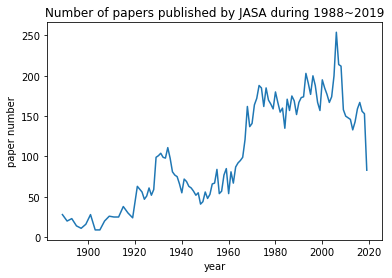

In [14]:
# 画图：论文数量随时间
plt.plot([x for [x,y] in paper_num], [y for [x,y] in paper_num])
plt.xlabel('year')
plt.ylabel('paper number')
plt.title('Number of papers published by JASA during 1988~2019')

In [16]:
#### 去除摘要为None的论文
paper_num_abs = []
for key,val in sorted(abstracts.items()):
    if key > '1923':
        paper_num_abs.append([int(key),sum([1 for [a,b] in val if b])])
    else:
        paper_num_abs.append([int(key),sum([1 for [a,b] in val if b])//2])

### 2. 网上上有摘要的论文数量

Text(0.5,1,'Number of papers (abstracts available) published by JASA during 1988~2019')

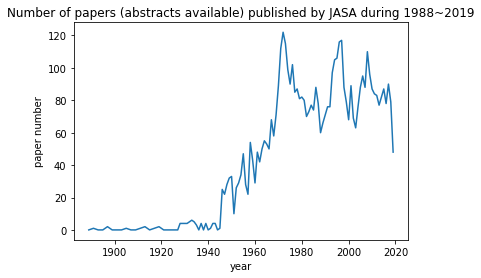

In [17]:
# 画图：论文数量随时间
plt.plot([x for [x,y] in paper_num_abs], [y for [x,y] in paper_num_abs])
plt.xlabel('year')
plt.ylabel('paper number')
plt.title('Number of papers (abstracts available) published by JASA during 1988~2019')

In [18]:
abs_word = json.load(open('abs_word.json'))     ## abs_word已经做了分词，并且去除了标点符号和停用词，即可以用来建立主题模型的单词数据

#### 统计词数
word_num = [[int(k),len(v)] for k,v in sorted(abs_word.items())]

### 3. 除去标点符号、停用词之后，每年摘要单词总数

Text(0.5,1,'Number of words')

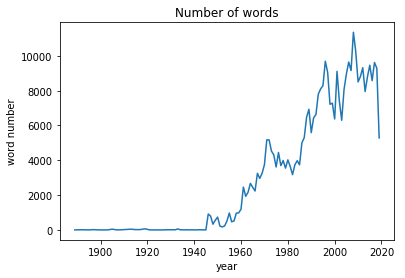

In [19]:
# 画图：词数随时间
plt.plot([x for [x,y] in word_num], [y for [x,y] in word_num])
plt.xlabel('year')
plt.ylabel('word number')
plt.title('Number of words')

In [20]:
#### 统计词频
word_freq = {}
for key,val in sorted(abs_word.items()):
    word_freq[key] = nltk.FreqDist(val)
vocab_amount = [[int(k),len(v)] for k,v in sorted(word_freq.items())]

### 4. 每年词汇库单词总数（即对单词去重后的数量）

Text(0.5,1,'Vocabulary amount')

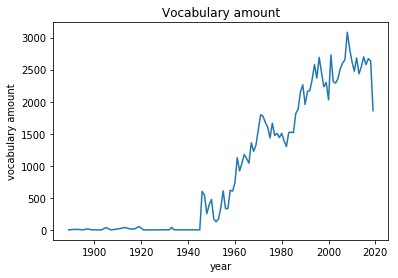

In [21]:
# 画图：词汇库单词数量随时间
plt.plot([x for [x,y] in vocab_amount], [y for [x,y] in vocab_amount])
plt.xlabel('year')
plt.ylabel('vocabulary amount')
plt.title('Vocabulary amount')

In [22]:
def getMostFreq(year_list,n = 20):
    if not year_list:
        return "no year_list"
    freq = Counter()
    for year in year_list:
        freq = freq + Counter(word_freq[year])
    words = sorted(dict(freq).items(), key = lambda x: x[1], reverse = True)
    return words[:n]

# 画图：高频词
def plotBar(mostfreq, title = 'High-frequency words'):
    x = [x for (x,y) in mostfreq]
    y = [y for (x,y) in mostfreq]
    plt.barh(y = range(len(x),0,-1), width = y, height = 0.5)
    plt.yticks(range(len(x),0,-1),x)
    plt.xlabel('number')
    plt.title(title)

### 5. 高频词
#### 1970年~1979年

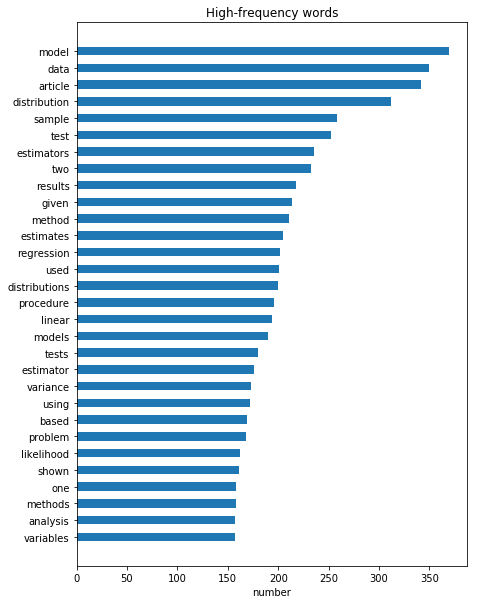

In [25]:
plt.figure(figsize=(7,10))
plotBar(getMostFreq([str(x) for x in range(1970,1980)], n = 30))

#### 1980年~1989年

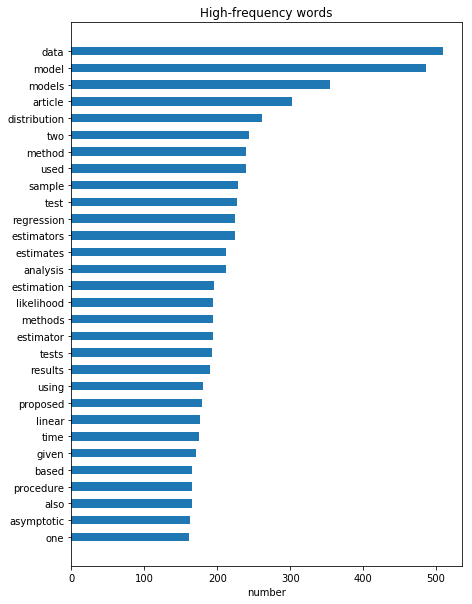

In [26]:
plt.figure(figsize=(7,10))
plotBar(getMostFreq([str(x) for x in range(1980,1990)], n = 30))

#### 1990年~1999年

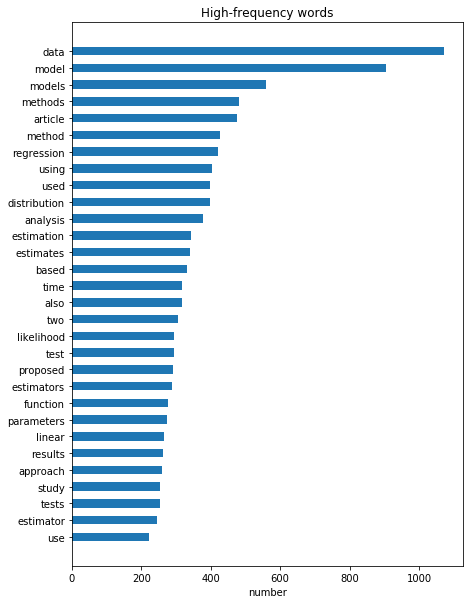

In [27]:
plt.figure(figsize=(7,10))
plotBar(getMostFreq([str(x) for x in range(1990,2000)], n = 30))

#### 2000年~2009年

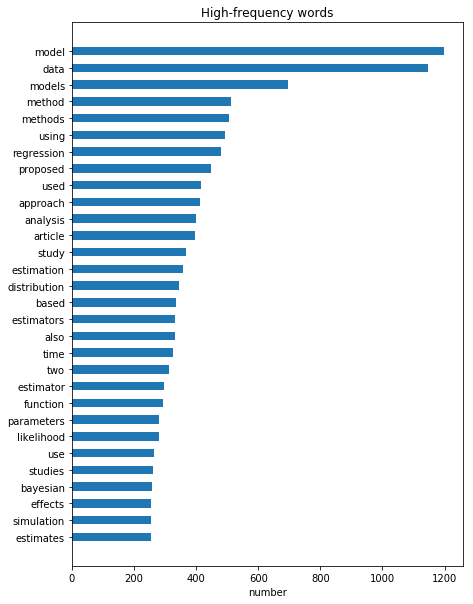

In [28]:
plt.figure(figsize=(7,10))
plotBar(getMostFreq([str(x) for x in range(2000,2010)], n = 30))

#### 2010年~2019年

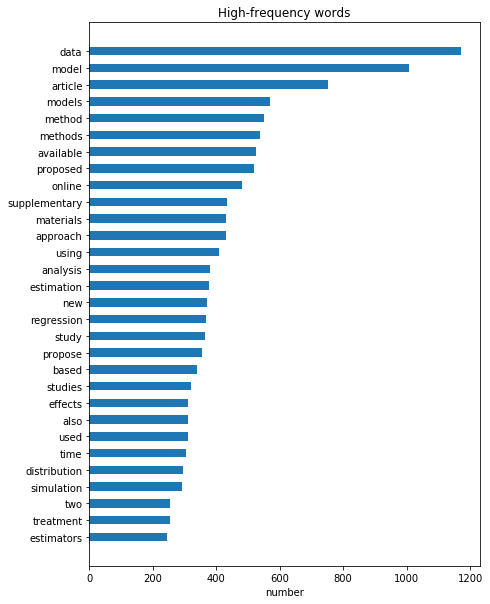

In [29]:
plt.figure(figsize=(7,10))
plotBar(getMostFreq([str(x) for x in range(2010,2020)], n = 30))

#### 高频词汇总

In [32]:
def getTopN_df(n):
    def getTopN_li(f,t):
        top_n = [x for x,y in getMostFreq([str(x) for x in range(f,t)], n = n)]
        return top_n
    top_words_df = pd.DataFrame({'Top_n': list(range(1,n+1)),
                                 'f1970t1979': getTopN_li(1970,1979),
                                'f1980t1989': getTopN_li(1980,1989),
                                'f1990t1999': getTopN_li(1990,1999),
                                'f2000t2009': getTopN_li(2000,2009),
                                'f2010t2019': getTopN_li(2010,2019)})
    return top_words_df
getTopN_df(50)

,Top_n,f1970t1979,f1980t1989,f1990t1999,f2000t2009,f2010t2019
0,1,model,data,data,model,data
1,2,data,model,model,data,model
2,3,article,models,models,models,article
3,4,distribution,article,article,methods,models
4,5,sample,distribution,methods,method,method
5,6,test,two,regression,using,methods
6,7,estimators,method,method,regression,proposed
7,8,two,sample,distribution,proposed,available
8,9,given,regression,using,used,online
9,10,results,used,used,approach,approach


### 5.总结
- 从可获得的论文摘要单词数量来看，1940年之前的摘要数据太少（单词数个位数），不可以用来建模，推荐从1970年~2019年或者1969年~2018年，刚好50年；
- 从高频词来看，像是model与models、use与using、method与methods这类单词应该被归为一个单词，但是并没有。所以，可能还需要对文本做**词形还原**（英文文本特有）。
- 从高频词来看，一些动词比如use、base、study等比较无法体现主题的词出现的频率太高了，感觉可能会对建模的结果有一些影响。所以，可能还需要做一些处理（比如**TF-IDF**？就是把一些在整个文本库中出现频率太高的单词，降低它的权重。相当于对文本提取特征。）